In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


In [111]:
df = pd.read_csv("tesla.csv")

In [112]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [113]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [114]:
df.value_counts().sum()

2193

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [116]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_11940\936118274.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [117]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

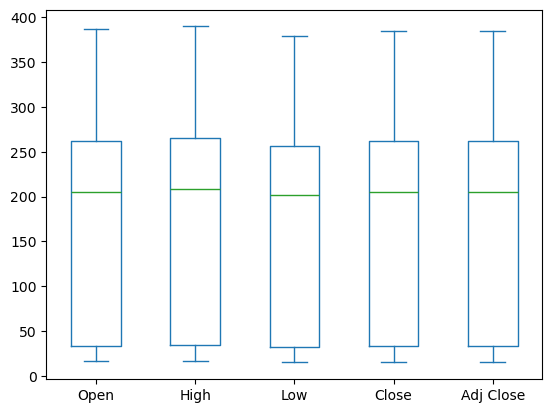

In [118]:
df[["Open","High","Low","Close","Adj Close"]].plot(kind="box")

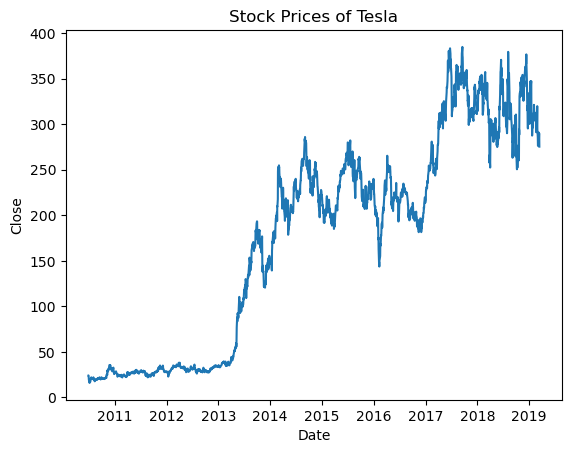

In [119]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

plt.plot(df["Date"],df["Close"])
plt.title("Stock Prices of Tesla")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [120]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [121]:
X = np.array(df.index).reshape(-1,1)
Y=  df["Close"]
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size=0.3,random_state=101)

In [122]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)


LinearRegression()

In [124]:
Y_pred_train = lm.predict(X_train_scaled)
Y_pred_test = lm.predict(X_test_scaled)

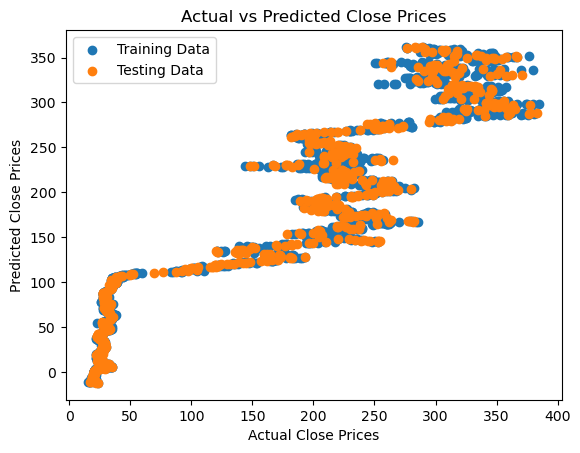

In [126]:
plt.scatter(Y_train, Y_pred_train, label='Training Data')
plt.scatter(Y_test, Y_pred_test, label='Testing Data')
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Close Prices")
plt.legend()
plt.show()

In [136]:
r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)


In [137]:
rmse_train = mse(Y_train, Y_pred_train)
rmse_test = mse(Y_test, Y_pred_test)

In [138]:
print(f"R-squared (R2) Score - Training: {r2_train:.4f}")
print(f"R-squared (R2) Score - Testing: {r2_test:.4f}")
print(f"Mean Squared Error (MSE) - Training: {rmse_train:.4f}")
print(f"Mean Squared Error (MSE) - Testing: {rmse_test:.4f}")
print(f"Root Mean Squared Error (RMSE) - Training: {rmse_train:.4f}")
print(f"Root Mean Squared Error (RMSE) - Testing: {rmse_test:.4f}")


R-squared (R2) Score - Training: 0.8659
R-squared (R2) Score - Testing: 0.8611
Mean Squared Error (MSE) - Training: 1821.3834
Mean Squared Error (MSE) - Testing: 1780.9875
Root Mean Squared Error (RMSE) - Training: 1821.3834
Root Mean Squared Error (RMSE) - Testing: 1780.9875
